In [ ]:
!pip install kaggle

In [ ]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"herutriana","key":"118f5ea13884086befa38b6655814576"}'}

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle datasets download -d herutriana/galaxy-zoo

 45% 9.00M/19.9M [00:01<00:02, 5.14MB/s]
100% 19.9M/19.9M [00:01<00:00, 12.5MB/s]


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler

In [ ]:
import zipfile,os
zip_lcl = '/content/galaxy-zoo.zip'
rzip = zipfile.ZipFile(zip_lcl, 'r')
rzip.extractall('/content')
rzip.close()

In [ ]:
df = pd.read_csv("/content/GalaxyZoo1_DR_table2.csv")
df.head()

,OBJID,RA,DEC,NVOTE,P_EL,P_CW,P_ACW,P_EDGE,P_DK,P_MG,P_CS,P_EL_DEBIASED,P_CS_DEBIASED,SPIRAL,ELLIPTICAL,UNCERTAIN
0,587727178986356823,00:00:00.41,-10:22:25.7,59,0.610,0.034,0.000,0.153,0.153,0.051,0.186,0.610,0.186,0,0,1
1,587727227300741210,00:00:00.74,-09:13:20.2,18,0.611,0.000,0.167,0.222,0.000,0.000,0.389,0.203,0.797,1,0,0
2,587727225153257596,00:00:01.03,-10:56:48.0,68,0.735,0.029,0.000,0.147,0.074,0.015,0.176,0.432,0.428,0,0,1
3,587730774962536596,00:00:01.38,+15:30:35.3,52,0.885,0.019,0.000,0.058,0.019,0.019,0.077,0.885,0.077,0,1,0
4,587731186203885750,00:00:01.55,-00:05:33.3,59,0.712,0.000,0.000,0.220,0.068,0.000,0.220,0.640,0.290,0,0,1


In [31]:
import datetime
import time
c = 0
for i in df['RA']:
  bb = sum(x * float(t) for x, t in zip([3600, 60, 1], i.split(":")))
#datetime.timedelta(hours=x.tm_hour,minutes=x.tm_min,seconds=x.tm_sec).total_seconds()
  df['RA'][c] = bb
  c += 1

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


In [ ]:
import datetime
import time
j = 0
for i in df['DEC']:
  bb = sum(x * float(t) for x, t in zip([3600, 60, 1], i.split(":")))
#datetime.timedelta(hours=x.tm_hour,minutes=x.tm_min,seconds=x.tm_sec).total_seconds()
  df['DEC'][j] = bb
  j += 1

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


In [35]:
len(df.columns)

16

In [33]:
df.to_csv('/content/galaxyzoo.csv')

In [36]:
df_x = df.iloc[:, 1:20]
df_x

,RA,DEC,NVOTE,P_EL,P_CW,P_ACW,P_EDGE,P_DK,P_MG,P_CS,P_EL_DEBIASED,P_CS_DEBIASED,SPIRAL,ELLIPTICAL,UNCERTAIN
0,0.41,-34654.3,59,0.610,0.034,0.000,0.153,0.153,0.051,0.186,0.610,0.186,0,0,1
1,0.74,-31599.8,18,0.611,0.000,0.167,0.222,0.000,0.000,0.389,0.203,0.797,1,0,0
2,1.03,-32592,68,0.735,0.029,0.000,0.147,0.074,0.015,0.176,0.432,0.428,0,0,1
3,1.38,55835.3,52,0.885,0.019,0.000,0.058,0.019,0.019,0.077,0.885,0.077,0,1,0
4,1.55,333.3,59,0.712,0.000,0.000,0.220,0.068,0.000,0.220,0.640,0.290,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
667939,86398.8,-29905.3,35,0.171,0.800,0.000,0.029,0.000,0.000,0.829,0.057,0.943,1,0,0
667940,86398.8,56941.3,21,0.810,0.048,0.000,0.095,0.048,0.000,0.143,0.758,0.193,0,0,1
667941,86398.8,56389.4,28,0.286,0.000,0.071,0.393,0.179,0.071,0.464,0.099,0.603,0,0,1
667942,86399,54558.8,23,0.391,0.000,0.043,0.000,0.130,0.435,0.043,0.390,0.045,0,0,1


In [38]:
x_array =  np.array(df_x)
print(x_array)

[[0.41 -34654.3 59 ... 0 0 1]
 [0.74 -31599.8 18 ... 1 0 0]
 [1.03 -32592.0 68 ... 0 0 1]
 ...
 [86398.81 56389.4 28 ... 0 0 1]
 [86399.02 54558.8 23 ... 0 0 1]
 [86399.37 -38908.5 54 ... 1 0 0]]


In [39]:
scaler = MinMaxScaler()
x_scaled = scaler.fit_transform(x_array)
x_scaled

array([[0.00000000e+00, 1.69041101e-02, 6.11111111e-01, ...,
        0.00000000e+00, 0.00000000e+00, 1.00000000e+00],
       [3.81949042e-06, 2.73444216e-02, 1.55555556e-01, ...,
        1.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [7.17601230e-06, 2.39530721e-02, 7.11111111e-01, ...,
        0.00000000e+00, 0.00000000e+00, 1.00000000e+00],
       ...,
       [9.99993518e-01, 3.28092385e-01, 2.66666667e-01, ...,
        0.00000000e+00, 0.00000000e+00, 1.00000000e+00],
       [9.99995949e-01, 3.21835376e-01, 2.11111111e-01, ...,
        0.00000000e+00, 0.00000000e+00, 1.00000000e+00],
       [1.00000000e+00, 2.36321210e-03, 5.55555556e-01, ...,
        1.00000000e+00, 0.00000000e+00, 0.00000000e+00]])

In [40]:
#Menentukan dan mengkonfigurasi fungsi kmeans 
kmeans = KMeans(n_clusters = 3, random_state=123)
#Menentukan kluster dari data
kmeans.fit(x_scaled)

KMeans(n_clusters=3, random_state=123)

In [41]:
print(kmeans.cluster_centers_)

[[ 5.12435082e-01  4.43023233e-01  3.76857635e-01  9.03826074e-01
   6.62531910e-03  8.20561933e-03  2.91125311e-02  4.34806936e-02
   8.69363410e-03  4.39635386e-02  8.89271815e-01  5.77638918e-02
   1.52524685e-03  9.98474753e-01  8.92619312e-14]
 [ 5.13029484e-01  4.43273021e-01  3.88276524e-01  6.09047371e-01
   4.20949633e-02  4.67532615e-02  1.55621661e-01  1.01030092e-01
   4.53731725e-02  2.44511228e-01  4.52775046e-01  3.73466511e-01
   5.71209746e-13  3.05852565e-13  1.00000000e+00]
 [ 5.16463756e-01  4.41815180e-01  3.84838795e-01  2.55673024e-01
   1.65824110e-01  1.78766639e-01  3.70768369e-01  2.11450744e-02
   7.75027613e-03  7.15404581e-01  1.01570084e-01  8.63231589e-01
   1.00000000e+00  1.97064587e-13 -7.01549929e-13]]


In [42]:
print(kmeans.labels_)
df["kluster"] = kmeans.labels_

[1 2 1 ... 1 1 2]


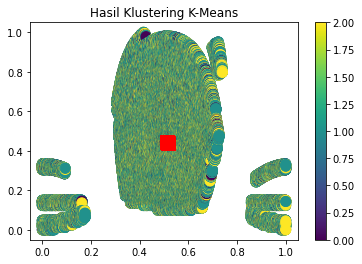

In [43]:
output = plt.scatter(x_scaled[:,0], x_scaled[:,1], s = 100, c = df.kluster, marker = "o", alpha = 1, )
centers = kmeans.cluster_centers_
plt.scatter(centers[:,0], centers[:,1], c='red', s=200, alpha=1 , marker="s");
plt.title("Hasil Klustering K-Means")
plt.colorbar(output)
plt.show()

In [44]:
df

,OBJID,RA,DEC,NVOTE,P_EL,P_CW,P_ACW,P_EDGE,P_DK,P_MG,P_CS,P_EL_DEBIASED,P_CS_DEBIASED,SPIRAL,ELLIPTICAL,UNCERTAIN,kluster
0,587727178986356823,0.41,-34654.3,59,0.610,0.034,0.000,0.153,0.153,0.051,0.186,0.610,0.186,0,0,1,1
1,587727227300741210,0.74,-31599.8,18,0.611,0.000,0.167,0.222,0.000,0.000,0.389,0.203,0.797,1,0,0,2
2,587727225153257596,1.03,-32592,68,0.735,0.029,0.000,0.147,0.074,0.015,0.176,0.432,0.428,0,0,1,1
3,587730774962536596,1.38,55835.3,52,0.885,0.019,0.000,0.058,0.019,0.019,0.077,0.885,0.077,0,1,0,0
4,587731186203885750,1.55,333.3,59,0.712,0.000,0.000,0.220,0.068,0.000,0.220,0.640,0.290,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
667939,587727226763870322,86398.8,-29905.3,35,0.171,0.800,0.000,0.029,0.000,0.000,0.829,0.057,0.943,1,0,0,2
667940,587730775499407475,86398.8,56941.3,21,0.810,0.048,0.000,0.095,0.048,0.000,0.143,0.758,0.193,0,0,1,1
667941,587727223024124280,86398.8,56389.4,28,0.286,0.000,0.071,0.393,0.179,0.071,0.464,0.099,0.603,0,0,1,1
667942,587730774425600239,86399,54558.8,23,0.391,0.000,0.043,0.000,0.130,0.435,0.043,0.390,0.045,0,0,1,1
